In [1]:
## plot
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.colors as colors
import matplotlib.cm as cmx


## operations
import numpy as np
from scipy.io import loadmat
from scipy import signal
from scipy.signal import butter, lfilter
from scipy import stats

## time_frequency
from mne.time_frequency import tfr_array_multitaper, psd_array_multitaper

## pac
# from pactools import Comodulogram, REFERENCES
# from pactools import simulate_pac

import pandas as pd

from statsmodels.formula.api import ols, mixedlm
import statsmodels.api as sm

## Saving data dictionaries
import pickle  

In [2]:
## Load study related info
with open('../Results/study_info.pickle', 'rb') as handle:
    study_info = pickle.load(handle,encoding='latin1')
    

density        = study_info['density'] 
speed          = study_info['speed'] 
dd             = study_info['dd'] ## Number of sensory cues (density)
dur            = study_info['dur'] ## Trial duration (sec)
K_i_idx        = study_info['K_i_idx']
K_i            = study_info['K_i']
uni            = study_info['uni']
t_dur          = study_info['t_dur']
t_dd           = study_info['t_dd']
sessions       = study_info['sessions'] 
ttl_idx        = study_info['ttl_idx']
hpc_electrodes = study_info['hpc_electrodes']
fs = study_info['fs']


## Load trial markers for each session
with open('../Results/trials_markers.pickle', 'rb') as handle:
    trials_markers = pickle.load(handle,encoding='latin1')

In [3]:
log_welch = np.load('../Results/log_welch_throughout_lap.npy',encoding='latin1')

In [4]:
all_sub_dom_in_space = {}

for ii in uni.astype(int): all_sub_dom_in_space[ii] = []

for sub in range(len(log_welch)):

    data = {}

    for uu in uni.astype(int):

        data[uu] = []

        for tt in range(len(log_welch[sub])):

            if int(log_welch[sub][tt][3]) == uu:

                #data[uu].append( stats.zscore(log_welch[sub][tt][4]) )
                data[uu].append( log_welch[sub][tt][4] )



    for kk in np.sort( list(data.keys()) ):    
        mmm = np.mean(np.array(data[kk]), axis=0)
        all_sub_dom_in_space[kk].append( mmm  )


In [5]:
plt.figure( figsize=(28,2.3))
plt.suptitle("Theta throughout the maze", fontsize=16, y=1.1)

for cuesec in range(len(data.keys())):

    ax = plt.subplot(1,len(data.keys()),cuesec+1)
    
    kk = np.sort(list(data.keys()))[cuesec]
#     mm = np.mean(np.array(data[kk]), axis=0)
    mm = np.mean( np.array(all_sub_dom_in_space[kk] ), axis=0) 


    patches, colors = [], []
    for ii in range(len(mm)):
        patches.append(  Wedge((.0, .0), .9, 360./mm.size*ii , 360./mm.size*(ii+1) , width=0.50)   )
        colors.append(mm[ii])

    p = PatchCollection(patches)
    p.set_array(np.array(colors))

    ax.add_collection(p)

#     p.set_clim([3.8,4.6])
    plt.colorbar(p, ax=ax)

    ax.set_title(str(kk) + " cues/sec")
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)    
    ax.axis('off')


NameError: name 'data' is not defined

<Figure size 2016x165.6 with 0 Axes>

 
8.975e-05 x + 4.221
cuesec 2
FriedmanchisquareResult(statistic=24.051248867607075, pvalue=0.11804917641028456)
------------------------------
 
-0.000422 x + 4.284
cuesec 3
FriedmanchisquareResult(statistic=13.899518238128014, pvalue=0.3071708694742855)
------------------------------
 
-0.0006627 x + 4.463
cuesec 4
FriedmanchisquareResult(statistic=20.44393853158796, pvalue=0.025322608987939973)
------------------------------
 
-0.0007147 x + 4.299
cuesec 5
FriedmanchisquareResult(statistic=23.321077162092145, pvalue=0.1390867953691597)
------------------------------
 
-0.0005384 x + 4.291
cuesec 7
FriedmanchisquareResult(statistic=25.99449415003442, pvalue=0.010753159419582766)
------------------------------
 
-0.0001579 x + 4.252
cuesec 8
FriedmanchisquareResult(statistic=18.957988624612188, pvalue=0.330948906156397)
------------------------------
 
-0.0001638 x + 4.242
cuesec 9
FriedmanchisquareResult(statistic=10.694365395560625, pvalue=0.3818201676200849)
-----------------------

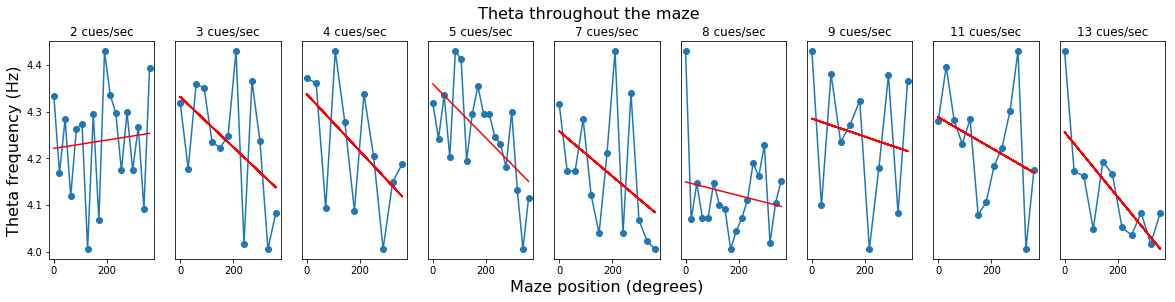

In [184]:
slopes = []
ccc = []

plt.figure( figsize=(20,4))
plt.suptitle("Theta throughout the maze", fontsize=16, y=1.)

counter = 1
for cuesec in range(len(data.keys())):
    
    kk = np.sort(list(data.keys()))[cuesec]
    mm = np.mean( np.array(all_sub_dom_in_space[kk] ), axis=0)
    
    plt.subplot(1, len(data.keys()), counter)
    plt.plot( np.linspace(0,360, mm.size),  mm, '-o')
    
    
    yy = np.array( all_sub_dom_in_space[kk] ).flatten()
    xx = np.tile(np.linspace(0,360, mm.size),8)
    z = np.polyfit(xx, yy, 1)
    p = np.poly1d(z)
    plt.plot(xx, p(xx),'r')
    
    print(p)
    slopes.append(  p )
    ccc.append(kk)
    
    
    print( 'cuesec ' + str(kk))
    
#     print stats.friedmanchisquare(  *[ all_sub_dom_in_space[kk][ii] for ii in range(len(all_sub_dom_in_space[kk]))]  )
    print( stats.friedmanchisquare(  *[ ii for ii in np.array(all_sub_dom_in_space[kk]).T ]  ) )

    
    print( '------------------------------')
    
    
    
    r,pval = stats.pearsonr(xx,yy)

    corr_stats = "r:" +str(np.round(r,3)) +"\n p:"+  str(np.round(pval,3))
    
#     plt.text( 10, 3.85, corr_stats , fontsize=15)
    
    
    plt.title(str(kk) + " cues/sec")    
#     plt.ylim(3.8,4.6)
    if counter != 1: plt.yticks([])
    if counter == 1: plt.ylabel('Theta frequency (Hz)', fontsize=16)        
    if counter == 5: plt.xlabel('Maze position (degrees)', fontsize=16)
        
    counter += 1
    
    
    
slopes = np.array(slopes)

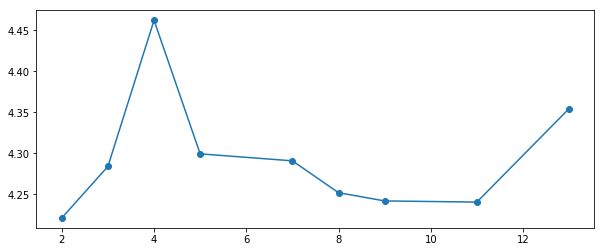

In [186]:
# jet = cm = plt.get_cmap('YlOrBr_r')
# cNorm  = colors.Normalize(vmin=0, vmax= slopes.shape[0]+1 )
# scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

plt.figure(figsize=(10,4))
# for ii in range(slopes.shape[0]):
#     colorVal = scalarMap.to_rgba(ii)
#     plt.plot(slopes[ii][0], slopes[ii][1], color=colorVal)



plt.plot(ccc, slopes[:,0],'-o')
# plt.plot(slopes[:,0]*slopes[:,1],'-o')



In [187]:
sub = 0

cuesec = []
domfreqs = []
for tt in range(len(log_welch[sub])):
    cuesec.append( int(log_welch[sub][tt][3]) )
    domfreqs.append( np.array(log_welch[sub][tt][4]) )
domfreqs = np.array(domfreqs)


mean_df = []
mean_cs = []
for df in np.unique(cuesec):
    idx = np.where(  cuesec == df )[0]    
    mean_df.append(  np.concatenate(domfreqs[idx])  )
    mean_cs.append(  np.tile(np.arange(domfreqs[idx].size),domfreqs[idx][0].size) )


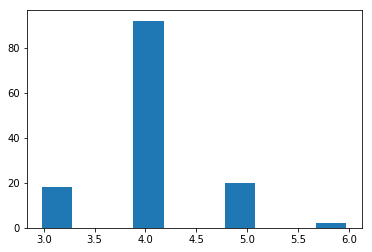

In [188]:
# plt.plot(mean_cs[0],  mean_df[0], '.')

plt.hist(np.concatenate(domfreqs[idx]));